# Project Business Statistics: E-news Express

## Business Context
The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?


## Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website
2. group - Whether the user belongs to the first group (control) or the second group (treatment)
3. landing_page - Whether the landing page is new or old
4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
5. converted - Whether the user gets converted to a subscriber of the news portal or not
6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Library to help with statistical analysis
import scipy.stats as stats

# import the scipy package and check the version to be sure that the version is above 1.6.1 so that some updated functions do not throw error.
import scipy
scipy.__version__

'1.11.3'

## Reading the Data into a DataFrame

In [ ]:
# read the data from file
df = pd.read_csv('/content/drive/MyDrive/DSBA - UTA/Course Work/Project 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Returns the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Returns the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# View the shape of the dataset and count the number of rows and columns of the dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 100 rows and 6 columns


**Observation:** There are 100 rows and 6 columns.

In [ ]:
# Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observation:** All of the above datatypes are as expected.

In [ ]:
# Checking for missing values in the data using isnull() function
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observation:** There are no missing values in the data.

In [ ]:
# Checking the for any duplicate records
df[df.duplicated()]

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


**Observation:** The dataset doesn't contain any duplicate values.

In [ ]:
# Obtaining statistical summary of numerical and categorical data
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

1. The user_id is a colum consisting of unique user-ids.

2. The mean time spent by a user on the landing page is 5.38 minutes while the meadian is 5.42 minutes.

3. Below is the statistical summary for the categorical variables:

  1. **group** has 2 unique values **control** and **treatment** with **control** being the top occuring value.
  2. **landing_page** has 2 unique values **old** and **new** with **old** being the top occuring value.
  3. **converted** has 2 unique values **yes** and **no** with **yes** being the top occuring value.
  4. **landing_page** has 2 unique values **English**, **Spanish** and **French** with **Spanish** being the top occuring value.

## **Univariate Analysis**

#### **1. UserID:**

In [ ]:
# Check number of unique users
print(f'# of unique users:',df['user_id'].nunique())

# of unique users: 100


**Observation:** The are 100 unique users from 100 available records.

#### **2. Group:**

Count of control and treatments records: control      50
treatment    50
Name: group, dtype: int64


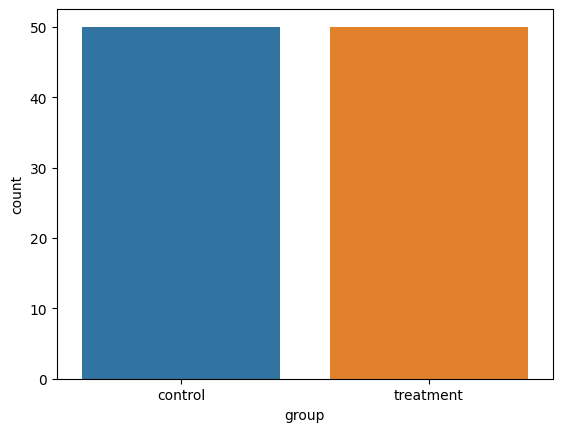

In [ ]:
# Check nummber of group records
print(f'Count of control and treatments records:',df['group'].value_counts())

# Plot a bar chart for visual representation
sns.countplot(data=df,x='group')
plt.show();

**Observation:** Dataset is equally divided (50 records) with one half used as control group and the other used as treatment group.

#### **3. Landing page:**

Count of users visiting landing page: old    50
new    50
Name: landing_page, dtype: int64


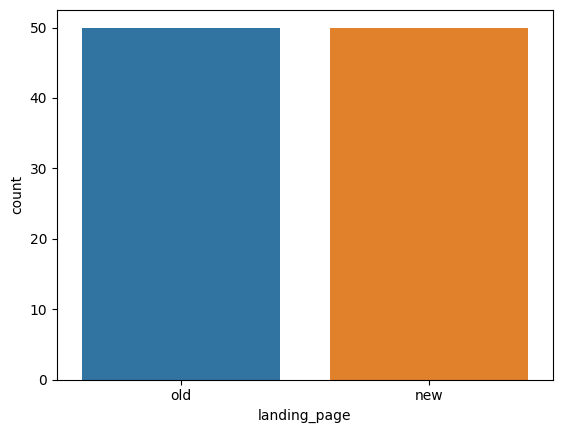

In [ ]:
# Check number of users visitng the landing page
print(f'Count of users visiting landing page:',df['landing_page'].value_counts())

# Plot a bar chart for visual representation
sns.countplot(data=df,x='landing_page')
plt.show();

**Observation:** Dataset is equally divided (50 records) with one half of the users visiting old page and the other visiting new page.

#### **4. Time Spent On the Page:**

Count of records: 100


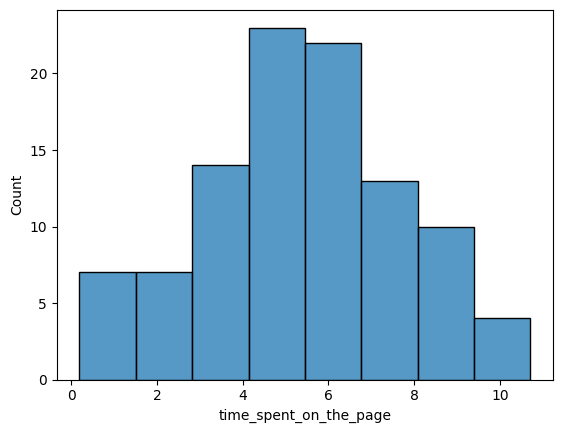

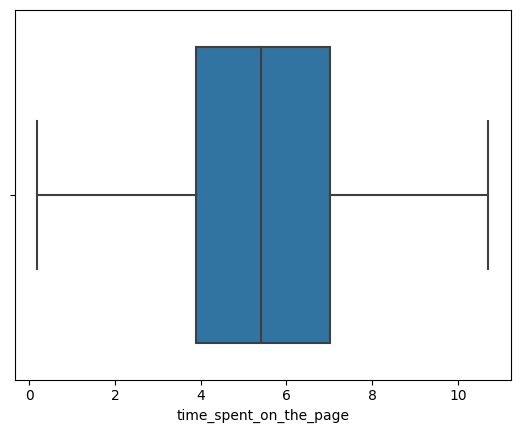

In [ ]:
# We will use Histogram and Boxplot to measure the distribution and dispersion of the users spending time on the page within the dataset

print(f'Count of records:',df['time_spent_on_the_page'].count())

sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

**Observation:** We can see from the "time_spent_on_the_page" histogram and boxplot that it has a standard normal distribution. As seen most of the users spend anywhere betwwen 4 minutes to 7 minutes on the landing page.

#### **5. Converted:**

Count of converted and non-converted user records: yes    54
no     46
Name: converted, dtype: int64


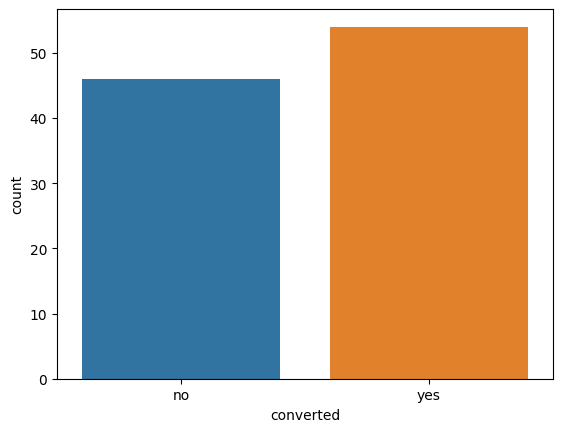

In [ ]:
print(f'Count of converted and non-converted user records:',df['converted'].value_counts())

# Plot a bar chart for visual representation
sns.countplot(data=df,x='converted')
plt.show();

**Observation:** 54% of the total users have subscribed to the E-news Express service.

#### **6. Language Preferred:**

Count of English, Spanish and French readers: Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


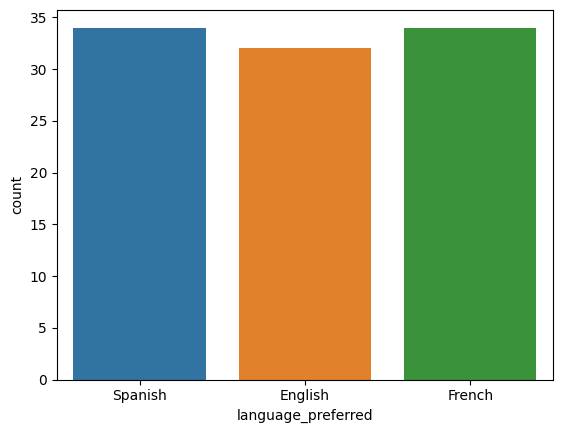

In [ ]:
print(f'Count of English, Spanish and French readers:',df['language_preferred'].value_counts())

# Plot a bar chart for visual representation
sns.countplot(data=df,x='language_preferred')
plt.show();

**Observation:** The count of different language users is equally proportionate across the dataset.

## **Bivariate Analysis**

### **1. Testing Group vs.Time spent on the landing page**

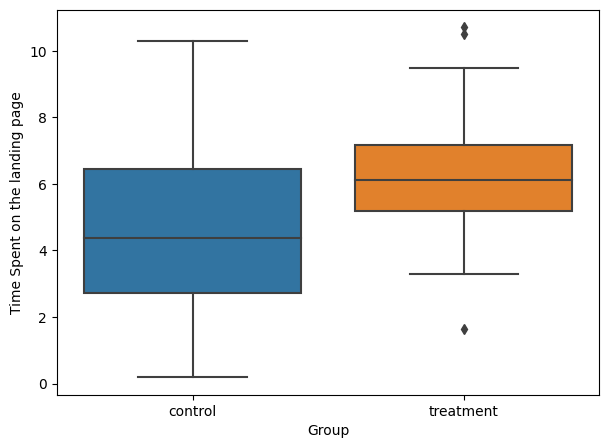

In [ ]:
# Relationship between Group and Time spent on the landing page

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='group',y='time_spent_on_the_page')
plt.xlabel('Group')
plt.ylabel('Time Spent on the landing page')
plt.show();

In [ ]:
# create subset data for control and treatment group users
control_group = df[df['group'] == 'control']['time_spent_on_the_page']
treatment_group = df[df['group'] == 'treatment']['time_spent_on_the_page']

# Calculate the mean time spent by control group users vs. treatment group users on the landing page
print('Avg. Time Spent on old landing page by the control group is', np.round(control_group.mean(),2),'mins')
print('Avg. Time Spent on new landing page by the treatment group is', np.round(treatment_group.mean(),2),'mins')

Avg. Time Spent on old landing page by the control group is 4.53 mins
Avg. Time Spent on new landing page by the treatment group is 6.22 mins


**Observation:** Avg. time users spent on the new landing page increased by 37% at 6.22 minutes.

### **2. Converted Users vs.Time spent on the landing page**

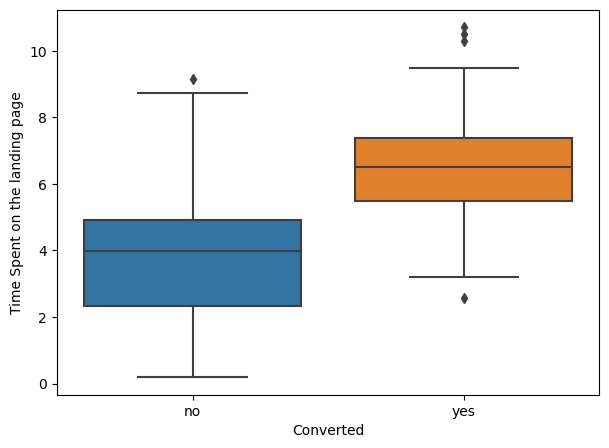

In [ ]:
# Relationship between Group and Time spent on the landing page

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.xlabel('Converted')
plt.ylabel('Time Spent on the landing page')
plt.show();

In [ ]:
# create subset data for converted and non-converted users
non_converted_users = df[df['converted'] == 'no']['time_spent_on_the_page']
converted_users = df[df['converted'] == 'yes']['time_spent_on_the_page']

# Calculate the mean time spent by the converted vs. the non-converted users on the landing page
print('Avg. Time Spent by the users that did not subscribe is', np.round(non_converted_users.mean(),2),'mins')
print('Avg. Time Spent by the users that subscribed is', np.round(converted_users.mean(),2),'mins')

Avg. Time Spent by the users that did not subscribe is 3.92 mins
Avg. Time Spent by the users that subscribed is 6.62 mins


**Observation:** Users that have subscribed to the service have on an average spent 69% more time than the users that didn't at 6.62 minutes.

### **3. User Language Preferrence vs.Time spent on the landing page**

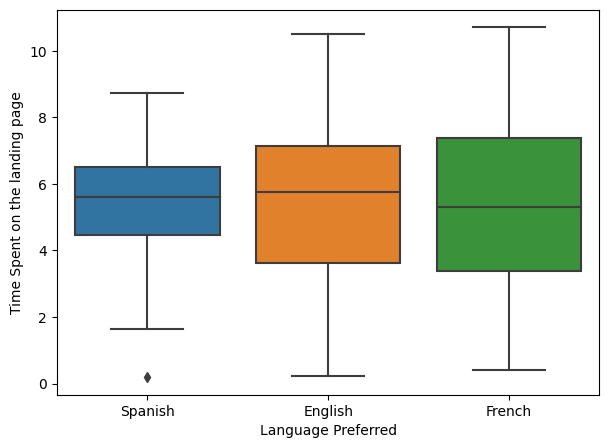

In [ ]:
# Relationship between Group and Time spent on the landing page

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the landing page')
plt.show();

In [ ]:
# create subset data for users with language preference
spanish_users = df[df['language_preferred'] == 'Spanish']['time_spent_on_the_page']
english_users = df[df['language_preferred'] == 'English']['time_spent_on_the_page']
french_users = df[df['language_preferred'] == 'French']['time_spent_on_the_page']

# Calculate the mean time spent by the users with different language preference for the landing page
print('Avg. Time Spent by the users that preferred Spanish is', np.round(spanish_users.mean(),2),'mins')
print('Avg. Time Spent by the users that preferred English is', np.round(english_users.mean(),2),'mins')
print('Avg. Time Spent by the users that preferred French is', np.round(french_users.mean(),2),'mins')

Avg. Time Spent by the users that preferred Spanish is 5.33 mins
Avg. Time Spent by the users that preferred English is 5.56 mins
Avg. Time Spent by the users that preferred French is 5.25 mins


**Observation:** There doesn't seem to be any sigificant difference with respect to the time spent on the landing page by different language users.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

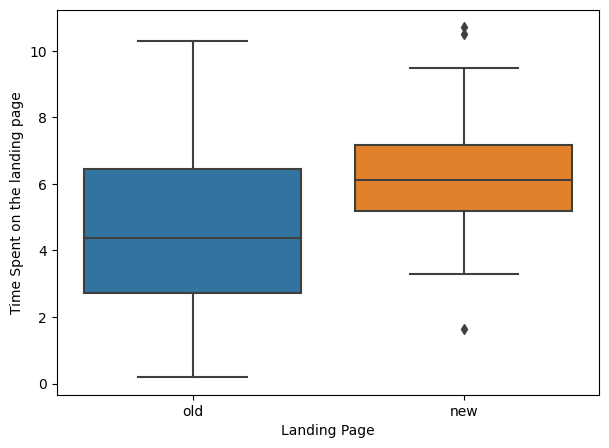

In [ ]:
# Relationship between the type of landing page and the time spent on the landing page

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the landing page')
plt.show();

In [ ]:
# create subset data for new and old landing page users
time_spent_old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
time_spent_new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Calculate the mean time spent by users on the old vs. the new landing page
print('Avg. Time Spent by the users on old landing page is', np.round(time_spent_old_page.mean(),2),'mins')
print('Avg. Time Spent by the users on new landing page is', np.round(time_spent_new_page.mean(),2),'mins')

Avg. Time Spent by the users on old landing page is 4.53 mins
Avg. Time Spent by the users on new landing page is 6.22 mins


**Observation:** Users have on an average spent 37% more time on new landing page than the old at 6.22 minutes.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The mean time users spend on the old landing page is equal to that of the new landing page. <br>
$H_a:$ The mean time users spend on the old landing page is less than that of the new landing page.

Let $\mu_1$,  $\mu_2$ be the mean time users spend on the old landing page and the new landing page respectively <br>

Mathematically, the above formulated hypotheses can be written as:
> $H_0:$ $\mu_1$ = $\mu_2$ <br>
> $H_a:$ $\mu_1$ < $\mu_2$ <br>

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with means. A test of two sample means from two independent populations when std. devs. are unknown can be used to analyse the hypotheses and draw a conclusion. We shall use a 2-sample independent T test for this problem.

### Step 3: Decide the significance level

Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
print('The Standard deviation of the users on old landing page is', np.round(time_spent_old_page.std(),2),'mins')
print('The Standard deviation of the users on new landing page is', np.round(time_spent_new_page.std(),2),'mins')

The Standard deviation of the users on old landing page is 2.58 mins
The Standard deviation of the users on new landing page is 1.82 mins


### Step 5: Calculate the p-value

In [ ]:
# import the required function from scipy library
from scipy.stats import ttest_ind

# Calculate the p-value
test_stat, p_value = ttest_ind(time_spent_old_page, time_spent_new_page, equal_var = False, alternative = 'less')

print('The p-value is', p_value)


The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that users spend more time on new landing page than the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

<Figure size 500x700 with 0 Axes>

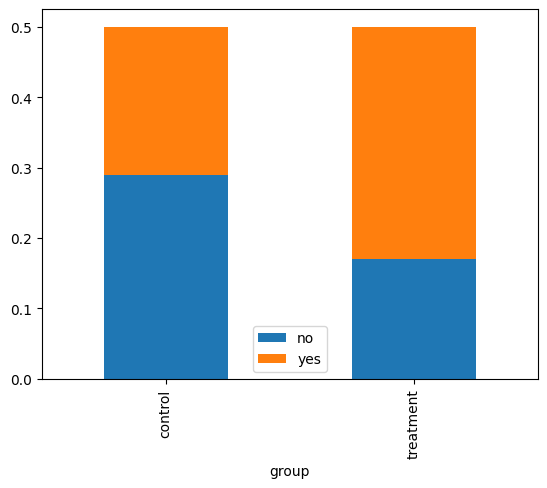

In [ ]:
# visual Analysis
plt.figure(figsize=(5,7))
pd.crosstab(df.group,df.converted,normalize=True).plot(kind='bar',stacked=True)
plt.legend()
plt.show();

**Observation:** Based on the sample data, we can infer that the proportion of users who have converted are higher within the treatment group, but is this difference significant enough to conclude that conversion rate for the new page is greater than that of the old page?

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ The proportion of the users who visit the old landing page and get converted is greater or equal to that of the users who visit the new landing page and get converted. <br>
$H_a:$ The proportion of the users who visit the old landing page and get converted is less than that of the users who visit the new landing page and get converted.

Let $p, p_0$ be the proportion of users who visit the old landing page and new landing page and get converted respectively <br>

Mathematically, the above formulated hypotheses can be written as:
>$H_0: p \ge p_o $<br>
>$H_a: p < p_o $ <br>

### Step 2: Select Appropriate test

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

### Step 3: Decide the significance level

Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# number of converted users within control groups
control_group_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
# number of converted users within treatment groups
treatment_group_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

print('The numbers of converted users for the control and treatment groups are {0} and {1} respectively'.format(control_group_converted,treatment_group_converted))

# number of users in the control group
total_control = df.group.value_counts()['control']
# number of users in the treatment group
total_treatment = df.group.value_counts()['treatment']

print('The numbers of users in the control and treatment groups are {0} and {1} respectively'.format(total_control, total_treatment ))

The numbers of converted users for the control and treatment groups are 21 and 33 respectively
The numbers of users in the control and treatment groups are 50 and 50 respectively


In [ ]:
print(f' The proportions of users who visit the old and new landing pages and get converted are {round(21/50,2)}, {round(33/50,2)} respectively')

 The proportions of users who visit the old and new landing pages and get converted are 0.42, 0.66 respectively


**The proportions in the sample are different. Let's conduct the test to see if this difference is significant.**

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from statsmodels.stats.proportion import proportions_ztest

# find the p-value using proportion_ztest
stat, pval = proportions_ztest([control_group_converted, treatment_group_converted] , [total_control, total_treatment], alternative = 'smaller')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

<Figure size 600x800 with 0 Axes>

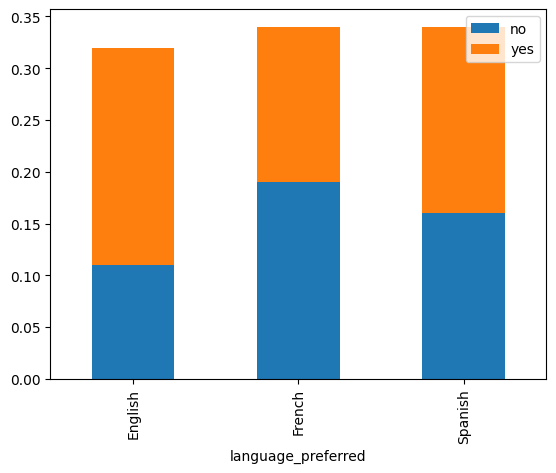

In [ ]:
# visual analysis
plt.figure(figsize=(6,8))
pd.crosstab(df.language_preferred,df.converted,normalize=True).plot(kind='bar',stacked=True)
plt.legend()
plt.show();

**Observations:**
* The proportion of subscribed users is higher with users having English and Spanish as their preferred choice of language for the landing page.
* Based on the sample data, we can infer that the proportion of users who have converted are higher with two preferred languages, but is this difference significant enough to conclude that conversion is dependent on the preferred language?

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

$H_0:$ Preffered Language and conversions are independent of each other

$H_a:$ Preffered Language and conversions are dependent on each other

### Step 2: Select Appropriate test

To test the dependence between two categorical variables, we will use the Chi-square test for independence.

### Step 3: Decide the significance level

Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a contingency table to tabulate the frequencies of the two categorical variables
contingency_table = pd.crosstab(df.language_preferred,df.converted,margins=True)
contingency_table

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


* There are a total of 100 users in the sample
* With English as the preferred language, 21 out of 32 (or 65.62%) users are subscribed users.
* With Spanish as the preferred language, 15 out of 34 (44.11%) users are subscribed users.
* With French as the preferred language, 18 out of 34 (52.94%) users are subscribed users.

### Step 5: Calculate the p-value

In [ ]:
# import the required test function
from scipy.stats import chi2_contingency

# calculate the test results
chi, p_value, dof, expected = chi2_contingency(contingency_table)

print("Test Statistic =",chi)
print("p-value =",p_value)
print("Degrees of freedom =",dof)
print("Expected frequencies \n", expected)

Test Statistic = 3.0930306905370837
p-value = 0.7970832186581234
Degrees of freedom = 6
Expected frequencies 
 [[ 14.72  17.28  32.  ]
 [ 15.64  18.36  34.  ]
 [ 15.64  18.36  34.  ]
 [ 46.    54.   100.  ]]


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.7970832186581234 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value (~0.7970) is greater than the level of significance, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that preferred language and conversion are independent of each other.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# Filter data to only the users visiting new landing page
df_new = df[df['landing_page'] == 'new']

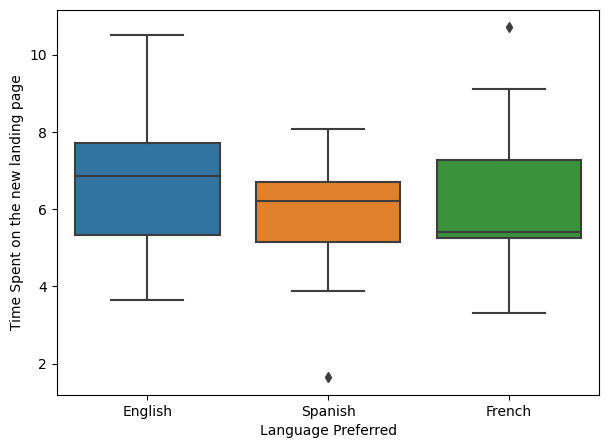

In [ ]:
# visual analysis
plt.figure(figsize=(7,5))
sns.boxplot(data=df_new,x='language_preferred',y='time_spent_on_the_page')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the new landing page')
plt.show();

In [ ]:
# Calculate the mean time spent on the new page for different language users
print(f'Mean:',df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean())
print(f'Median:',df_new.groupby(['language_preferred'])['time_spent_on_the_page'].median())

Mean: language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64
Median: language_preferred
English    6.865
French     5.420
Spanish    6.200
Name: time_spent_on_the_page, dtype: float64


**Observation:**
* The distribution of time spent on the new landing page seems to differ among the three preferred language groups.
* Variation is higher in the median time spent on the new page between French and English language users and French and Spanish language users. Whereas we do not see much difference in the mean time spent on the new page between different language users.
* Is the osberved difference in time spent on the new page among the three groups significant enough to conclude the same about the three preferred languages? To determine this, we will test the difference using a statistical test.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0$ : The mean time spent on new landing page with respect to each preferred language is equal. <br>
> $H_a$ : The mean time spent on new landing page with respect to each preferred language is different.

### Step 2: Select Appropriate test

This is a problem, concerning three population means. One-way ANOVA is an appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

**Shapiro-Wilk’s test**

We will test the null hypothesis

>$H_0:$ The time spent on the new landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ The time spent on the new landing page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# Use the shapiro function for the scipy.stats library for this test

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis.


Since p-value (~0.8040) is larger than the level of significance, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the the data for time spent on the new page follows a normal distribution.

**Levene’s test**

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
# use levene function from scipy.stats library for this test

# find the p-value
statistic, p_value = stats.levene(df_new[df_new['language_preferred']=='English']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred']=='French']['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


Since p-value (~0.4671) is larger than the level of significance, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

Here, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create separate variables to store the time spent on new landing page with respect to the three preffered languages
time_spent_english = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_french  = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# import the required function
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value = f_oneway(time_spent_english, time_spent_spanish, time_spent_french)
print('The p-value is ', p_value)

The p-value is  0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

As the p-value (~0.4320) is larger than the level of significance, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the time spent on new landing page is similar for different language users.

## Conclusion and Business Recommendations

### Insights:

As seen from the sample data:
* The users spend anywhere betwwen 4 minutes to 7 minutes on the landing page.

* 54% of the total users have subscribed to the E-news Express service.

* Mean time users spent on the new landing page increased by 37% at 6.22 minutes.

* Users that subscribed to the service have spent on an average 69% more time than the users that did not subscribe at 6.62 minutes.

* There doesn't seem to be any sigificant difference with respect to the time spent on the landing page by different language users.

### Conclusion:
There is enough statistical evidence to say that:
* The users spend more time on the new landing page than on the existing landing page (p-value of 0.0001 at 5% level of significance).


* The conversion rate of the users is greater for the new landing page than the old landing page (p-value of 0.0001 at 5% level of significance).


* The conversion rate did not have any dependence on users preferred choice of language (p-value of 0.7970 at 5% level of significance).


* The time spent on the new page is same for the different language users (p-value of 0.4320 at 5% level of significance).


### Recommendation:

* There is enough statistical evidence to say that new landing page will help generate more user conversions and thereby increase in revenue for E-news Express.

*  Recommend we launch new landing page for E-news Express users with a deployment strategy in place across different regions.

___